# Series

In [5]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [6]:
# a Series is akin to a python list, has indexes which are automatically set as ints if
# not set by index=...
obj = Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [7]:
# returns all values in Series as an array
obj.values

array([ 3,  6,  9, 12])

In [8]:
# returns all index values in Series as an array
obj.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
# create a series and set the indexes
ww2_cas = Series([8700000,4300000,3000000,2100000,400000],
                 index=['USSR','Germany','China','Japan','USA'])
ww2_cas

USSR       8700000
Germany    4300000
China      3000000
Japan      2100000
USA         400000
dtype: int64

In [10]:
# call a specific value
ww2_cas['USA']

400000

In [11]:
# check which countries had casualities greater than 4 million
# returns Series of those indexes and values
ww2_cas[ww2_cas > 4000000]

USSR       8700000
Germany    4300000
dtype: int64

In [12]:
# check for value in Series, return boolean
'USSR' in ww2_cas

True

In [13]:
# Series to dictionary
# dictionary is key-value pairs
ww2_dict = ww2_cas.to_dict()
ww2_dict

{'China': 3000000,
 'Germany': 4300000,
 'Japan': 2100000,
 'USA': 400000,
 'USSR': 8700000}

In [14]:
# dictionary to Series
ww2_series = Series(ww2_dict)
ww2_series

China      3000000
Germany    4300000
Japan      2100000
USA         400000
USSR       8700000
dtype: int64

In [18]:
countries = ['China','Germany','Japan','USA','USSR','Argentina']

# create Series using a dictionary and list
# no value to match list/index defaults to NaN value
obj2 = Series(ww2_dict,index=countries)
obj2

China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Argentina        NaN
dtype: float64

In [19]:
# checks to see if any indexes have a null value
pd.isnull(obj2)

China        False
Germany      False
Japan        False
USA          False
USSR         False
Argentina     True
dtype: bool

In [20]:
# checks for non-null values
pd.notnull(obj2)

China         True
Germany       True
Japan         True
USA           True
USSR          True
Argentina    False
dtype: bool

In [21]:
# adds values by index even if in different order
ww2_series + obj2

Argentina         NaN
China         6000000
Germany       8600000
Japan         4200000
USA            800000
USSR         17400000
dtype: float64

In [22]:
# give Series string name
obj2.name = "World War 2 Casualities"

# give indexes a string name
obj2.index.name = 'Countries'

obj2

Countries
China        3000000
Germany      4300000
Japan        2100000
USA           400000
USSR         8700000
Argentina        NaN
Name: World War 2 Casualities, dtype: float64

# DataFrames

In [23]:
import webbrowser

website = 'http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

In [24]:
#copy first 5 rows from above website
nfl_frame = pd.read_clipboard()
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN


In [25]:
# returns column names
nfl_frame.columns

Index([u'Rank', u'Team', u'Won', u'Lost', u'Tied', u'Pct.', u'First', u'NFL',
       u'Season', u'Total', u'Games', u'Divison'],
      dtype='object')

In [25]:
# returns Series of index and value by column name, only if one word name
nfl_frame.Team

0    Chicago
1     Dallas
Name: Team, dtype: object

In [26]:
# same thing for 2+ words
nfl_frame['Tied']

0    555
1    364
Name: Tied, dtype: int64

In [27]:
# call mulitple columns in new dataframe
DataFrame(nfl_frame, columns = ['Team','NFL','Season'])

# if you call the wrong column, it returns a column with NaN values

,Team,NFL,Season
0,Chicago,1920,"1,338"
1,Dallas,1960,850


In [28]:
# returns first 5 rows not including header, or can pass specific number of rows
nfl_frame.head()

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN


In [29]:
# same for last rows
nfl_frame.tail(1)

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN


In [30]:
# call 0th row
nfl_frame.ix[0]

Rank             1
Team       Chicago
Won          Bears
Lost           741
Tied           555
Pct.            42
First         0.57
NFL           1920
Season       1,338
Total          NFC
Games        North
Divison        NaN
Name: 0, dtype: object

In [31]:
# adds new column and fills it in with value passed
nfl_frame['Stadium'] = "Levi's Stadium"
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison,Stadium
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN,Levi's Stadium
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN,Levi's Stadium


In [32]:
# adds new column and fills it in with array
nfl_frame['Stadium'] = np.arange(2)
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison,Stadium
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN,0
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN,1


In [33]:
stadiums = Series(["Levi's Stadium", "AT&T Stadium"], index = [1, 0])
stadiums

1    Levi's Stadium
0      AT&T Stadium
dtype: object

In [34]:
# fill new column with Series that corresponds to current rows
nfl_frame['Stadium'] = stadiums
nfl_frame

# would fill in NaN for unassigned stadium column value

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison,Stadium
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN,AT&T Stadium
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN,Levi's Stadium


In [35]:
# delete column
del nfl_frame['Stadium']
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First,NFL,Season,Total,Games,Divison
0,1,Chicago,Bears,741,555,42,0.570,1920,"1,338",NFC,North,NaN
1,2,Dallas,Cowboys,480,364,6,0.568,1960,850,NFC,East,NaN


In [36]:
data = {'City':['SF','LA','NYC'],'Population':[837000, 3880000, 8400000]}

# construct dataframe from dictionary, keys are columns, int index automatically created
city_frame = DataFrame(data)
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


# Index Objects

In [37]:
my_ser = Series([1,2,3,4],index=['A','B','C','D'])
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [38]:
my_index = my_ser.index
my_index

Index([u'A', u'B', u'C', u'D'], dtype='object')

In [39]:
my_index[2]

'C'

In [40]:
# everything at and after 2nd index marker
my_index[2:]

Index([u'C', u'D'], dtype='object')

In [41]:
# indexes are immutable

# Reindex

In [44]:
from numpy.random import randn

In [45]:
ser1 = Series([1,2,3,4],index=['A','B','C','D'])
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [46]:
# sets NaN for indexes with no previous value
ser2 = ser1.reindex(['A','B','C','D','E','F'])
ser2

A     1
B     2
C     3
D     4
E   NaN
F   NaN
dtype: float64

In [47]:
# specifies what to pass as a value for if there is no previous value
ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)

A     1
B     2
C     3
D     4
E   NaN
F   NaN
G     0
dtype: float64

In [48]:
ser3 = Series(['USA','Mexico','Canada'],index=[0,5,10])
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [49]:
ranger = range(15)
ranger

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [50]:
# forward fill grabs previous value and forward fills it until it hits something with a value
ser3.reindex(ranger,method='ffill')

0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

In [52]:
# new dataframe with random numbers and row/columns
dframe = DataFrame(randn(25).reshape((5,5)),index=['A','B','D','E','F'],
                   columns=['col1','col2','col3','col4','col5'])
dframe

,col1,col2,col3,col4,col5
A,0.937594,0.981887,-0.554280,-1.417039,1.495914
B,0.209496,-1.046518,0.202139,0.699532,1.026486
D,0.693576,0.972453,-2.165698,1.533033,0.645723
E,-0.939908,1.319605,0.134256,-0.006354,-1.176561
F,0.250121,-0.659869,0.047564,-0.417788,0.539569


In [53]:
# fills C row with NaN because didn't previously have values
dframe2 = dframe.reindex(['A','B','C','D','E','F'])
dframe2

,col1,col2,col3,col4,col5
A,0.937594,0.981887,-0.554280,-1.417039,1.495914
B,0.209496,-1.046518,0.202139,0.699532,1.026486
C,NaN,NaN,NaN,NaN,NaN
D,0.693576,0.972453,-2.165698,1.533033,0.645723
E,-0.939908,1.319605,0.134256,-0.006354,-1.176561
F,0.250121,-0.659869,0.047564,-0.417788,0.539569


In [54]:
# same for columns without previous values
new_columns = ['col1','col2','col3','col4','col5','col6']
dframe2.reindex(columns=new_columns)

,col1,col2,col3,col4,col5,col6
A,0.937594,0.981887,-0.554280,-1.417039,1.495914,NaN
B,0.209496,-1.046518,0.202139,0.699532,1.026486,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.693576,0.972453,-2.165698,1.533033,0.645723,NaN
E,-0.939908,1.319605,0.134256,-0.006354,-1.176561,NaN
F,0.250121,-0.659869,0.047564,-0.417788,0.539569,NaN


In [55]:
# reindexed the above with one step addressing both columns and rows
dframe.ix[['A','B','C','D','E','F'],new_columns]

,col1,col2,col3,col4,col5,col6
A,0.937594,0.981887,-0.554280,-1.417039,1.495914,NaN
B,0.209496,-1.046518,0.202139,0.699532,1.026486,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,0.693576,0.972453,-2.165698,1.533033,0.645723,NaN
E,-0.939908,1.319605,0.134256,-0.006354,-1.176561,NaN
F,0.250121,-0.659869,0.047564,-0.417788,0.539569,NaN


# Drop Entry

In [56]:
ser4 = Series(np.arange(3),index=['a','b','c'])
ser4

a    0
b    1
c    2
dtype: int64

In [57]:
# drop an index
ser4.drop('b')

a    0
c    2
dtype: int64

In [59]:
# dataframe with column and row names
dframe3 = DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA','NY'],
                    columns=['pop','size','year'])
dframe3

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [61]:
# drop using index name
dframe3.drop('LA')

,pop,size,year
SF,0,1,2
NY,6,7,8


In [62]:
# save another array with the drop to make it permanent
dframe4 = dframe3.drop('LA')
dframe4

,pop,size,year
SF,0,1,2
NY,6,7,8


In [63]:
# to drop a column and specify its axis because default is 0
dframe3.drop('year',axis=1)

,pop,size
SF,0,1
LA,3,4
NY,6,7


# Selecting Entries

In [64]:
ser5 = Series(np.arange(3),index=['A','B','C'])
ser6 = 2*ser5
ser6

A    0
B    2
C    4
dtype: int64

In [65]:
# call by index
ser6['B']

2

In [67]:
# call by numerical index
ser6[1]

2

In [68]:
ser6[0:3]

A    0
B    2
C    4
dtype: int64

In [69]:
# call multiple values retured as Series
ser6[['A','B']]

A    0
B    2
dtype: int64

In [70]:
# if condition is true, return that index/value
ser6[ser6>3]

C    4
dtype: int64

In [71]:
# if condition is true, set value to 10
ser6[ser6>3]=10
ser6

A     0
B     2
C    10
dtype: int64

In [72]:
dframe5 = DataFrame(np.arange(25).reshape((5,5)),index=['NYC','LA','SF','DC','Chi'],
                  columns = ['A','B','C','D','E'])
dframe5

,A,B,C,D,E
NYC,0,1,2,3,4
LA,5,6,7,8,9
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [73]:
# call dataframe column index/value
dframe5['B']

NYC     1
LA      6
SF     11
DC     16
Chi    21
Name: B, dtype: int64

In [74]:
# run condition by column's values and returns dataframe with true rows
dframe5[dframe5['C']>8]

,A,B,C,D,E
SF,10,11,12,13,14
DC,15,16,17,18,19
Chi,20,21,22,23,24


In [75]:
dframe5 > 10

,A,B,C,D,E
NYC,False,False,False,False,False
LA,False,False,False,False,False
SF,False,True,True,True,True
DC,True,True,True,True,True
Chi,True,True,True,True,True


In [76]:
# reindexed with just LA column
dframe5.ix['LA']

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

In [77]:
# same but calling with index
dframe5.ix[1]

A    5
B    6
C    7
D    8
E    9
Name: LA, dtype: int64

# Data Alignment

In [89]:
ser7 = Series([0, 1, 2], index = ['A', 'B', 'C'])
ser7

A    0
B    1
C    2
dtype: int64

In [91]:
ser8 = Series([3, 4, 5, 6], index = ['A', 'B', 'C', 'D'])
ser8

A    3
B    4
C    5
D    6
dtype: int64

In [92]:
# adds where it matches, NaN stays NaN if no value in one or both
ser7 + ser8

A     3
B     5
C     7
D   NaN
dtype: float64

In [94]:
# makes a list out of A and B
dframe6 = DataFrame(np.arange(4).reshape((2, 2)), columns = list('AB'),
                   index = ['NYC', 'LA'])
dframe6

,A,B
NYC,0,1
LA,2,3


In [95]:
dframe7 = DataFrame(np.arange(9).reshape((3, 3)), columns = list('ADC'),
                   index = ['NYC', 'SF', 'LA'])
dframe7

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [96]:
dframe6 + dframe7

,A,B,C,D
LA,8,NaN,NaN,NaN
NYC,0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [97]:
# add dframes and anything null becomes 0 BEFORE adding
dframe6.add(dframe7, fill_value = 0)

,A,B,C,D
LA,8,3,8,7
NYC,0,1,2,1
SF,3,NaN,5,4


In [98]:
# create series from dframes 0 row with index of column names and same values
ser9 = dframe7.ix[0]
ser9

A    0
D    1
C    2
Name: NYC, dtype: int64

In [99]:
# subtracts values of series from dataframe while leaving the rest constant
dframe7 - ser9

,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


# Rank and Sort

In [101]:
ser10 = Series(range(3), index = ['C', 'A', 'B'])
ser10

C    0
A    1
B    2
dtype: int64

In [102]:
# orders by index
ser10.sort_index()

A    1
B    2
C    0
dtype: int64

In [104]:
# orders by values
ser10.sort_values()

C    0
A    1
B    2
dtype: int64

In [105]:
ser11 = Series(randn(10))
ser11

0    0.402390
1   -1.180631
2   -0.412122
3    0.595278
4   -1.193256
5   -0.571505
6    1.231771
7    0.118513
8    1.198525
9    0.242559
dtype: float64

In [107]:
# sort by values
ser11.sort_values()
ser11

4   -1.193256
1   -1.180631
5   -0.571505
2   -0.412122
7    0.118513
9    0.242559
0    0.402390
3    0.595278
8    1.198525
6    1.231771
dtype: float64

In [108]:
# a ranking based on relative values, ranking exists whether or not you sort
ser11.rank()

4     1
1     2
5     3
2     4
7     5
9     6
0     7
3     8
8     9
6    10
dtype: float64

# Summary Statistics

In [109]:
arr = np.array([[1, 2, np.nan], [np.nan, 3, 4]])

dframe8 = DataFrame(arr, index = ['A', 'B'], columns = ['One', 'Two', 'Three'])
dframe8

,One,Two,Three
A,1,2,NaN
B,NaN,3,4


In [111]:
# sum column values
dframe8.sum()

One      1
Two      5
Three    4
dtype: float64

In [112]:
# sum row values
dframe8.sum(axis = 1)

A    3
B    7
dtype: float64

In [114]:
# returns column with minimum value
dframe8.idxmin()

One      A
Two      A
Three    B
dtype: object

In [115]:
# returns column with maximum value
dframe8.idxmax()

One      A
Two      B
Three    B
dtype: object

In [116]:
# sums columns as you go down the dataframe by column
dframe8.cumsum()

,One,Two,Three
A,1,2,NaN
B,NaN,5,4


In [117]:
# summary statistics
dframe8.describe()

,One,Two,Three
count,1,2.000000,1
mean,1,2.500000,4
std,NaN,0.707107,NaN
min,1,2.000000,4
25%,1,2.250000,4
50%,1,2.500000,4
75%,1,2.750000,4
max,1,3.000000,4


In [118]:
from IPython.display import YouTubeVideo

In [119]:
# covariance help
YouTubeVideo('xGbpuFNR1ME')

In [120]:
# correlation help
YouTubeVideo('4EXNedimDMs')

In [124]:
import pandas.io.data as pdweb
import datetime

In [126]:
# pull Adj Close stock info from the web based on stock name and date range
prices = pdweb.get_data_yahoo(['CVX', 'XOM', 'BP'], start = datetime.datetime(2010, 1, 1),
                             end = datetime.datetime(2013, 1, 1))['Adj Close']
prices.head()

,BP,CVX,XOM
Date,,,
2010-01-04,45.569012,63.917128,58.703696
2010-01-05,45.892578,64.369872,58.932905
2010-01-06,46.131402,64.377952,59.442264
2010-01-07,46.115994,64.135417,59.255504
2010-01-08,46.223849,64.248601,59.017797


In [128]:
# pull Volume stock info from the web based on stock name and date range
volume = pdweb.get_data_yahoo(['CVX', 'XOM', 'BP'], start = datetime.datetime(2010, 1, 1),
                             end = datetime.datetime(2013, 1, 1))['Volume']
volume.head()

,BP,CVX,XOM
Date,,,
2010-01-04,3956100,10173800,27809100
2010-01-05,4109600,10593700,30174700
2010-01-06,6227900,11014600,35044700
2010-01-07,4431300,9626900,27192100
2010-01-08,3786100,5624300,24891800


In [130]:
# percent change of prices shows us return
rets = prices.pct_change()
rets.head()

,BP,CVX,XOM
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.007101,0.007083,0.003905
2010-01-06,0.005204,0.000126,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142
2010-01-08,0.002339,0.001765,-0.004012


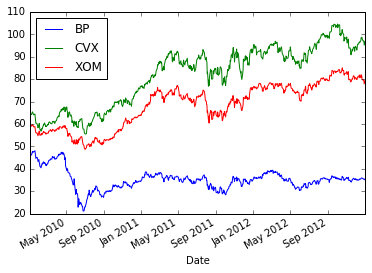

In [131]:
# correlation of stocks
corr = rets.corr

%matplotlib inline
prices.plot()

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt

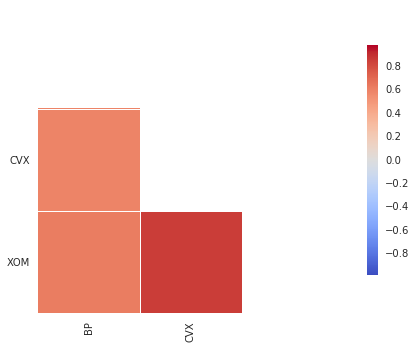

In [135]:
# plot of correlation
sns.corrplot(rets, annot = False, diag_names = False)

In [137]:
ser12 = Series(['w', 'w', 'x', 'y', 'z', 'w', 'x', 'y', 'x', 'a'])
ser12

0    w
1    w
2    x
3    y
4    z
5    w
6    x
7    y
8    x
9    a
dtype: object

In [138]:
# return unique values as array
ser12.unique()

array(['w', 'x', 'y', 'z', 'a'], dtype=object)

In [139]:
# how many of each value there are, returns Series with count
ser12.value_counts()

w    3
x    3
y    2
a    1
z    1
dtype: int64

# Missing Data

In [140]:
ser13 = Series(['one', 'two', np.nan, 'four'])
ser13

0     one
1     two
2     NaN
3    four
dtype: object

In [142]:
# missing data in a Series
ser13.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [143]:
ser13.dropna()

0     one
1     two
3    four
dtype: object

In [144]:
dframe9 = DataFrame([[1, 2, 3], [np.nan, 5, 6], [7, np.nan, 9], [np.nan, np.nan, np.nan]])
dframe9

,0,1,2
0,1,2,3
1,NaN,5,6
2,7,NaN,9
3,NaN,NaN,NaN


In [145]:
# any row with any null is dropped
clean_dframe = dframe9.dropna()
clean_dframe

,0,1,2
0,1,2,3


In [146]:
# drops row with all null values
dframe9.dropna(how = 'all')

,0,1,2
0,1,2,3
1,NaN,5,6
2,7,NaN,9


In [147]:
# drops columns with any null value
dframe9.dropna(axis = 1)

""
0
1
2
3


In [148]:
npn = np.nan

dframe10 = DataFrame([[1, 2, 3, npn], [2, npn, 5, 6], [npn, 7, npn, 9], [1, npn, npn, npn]])
dframe10

,0,1,2,3
0,1,2,3,NaN
1,2,NaN,5,6
2,NaN,7,NaN,9
3,1,NaN,NaN,NaN


In [149]:
# set minimum number of data points required to keep row
dframe10.dropna(thresh = 2)

,0,1,2,3
0,1,2,3,NaN
1,2,NaN,5,6
2,NaN,7,NaN,9


In [150]:
# fill NaN values with 1
dframe10.fillna(1)

,0,1,2,3
0,1,2,3,1
1,2,1,5,6
2,1,7,1,9
3,1,1,1,1


In [151]:
# fill NaN values in each column by second value, i.e. columnindex:fillvalue
dframe10.fillna({0:0, 1:1, 2:2, 3:3})

,0,1,2,3
0,1,2,3,3
1,2,1,5,6
2,0,7,2,9
3,1,1,2,3


In [152]:
# without setting it equal to save on itself, can set inplace equal to true
dframe10.fillna({0:0, 1:1, 2:2, 3:3}, inplace = True)
dframe10

,0,1,2,3
0,1,2,3,3
1,2,1,5,6
2,0,7,2,9
3,1,1,2,3


# Index Hierarchy

In [153]:
# index and subindex
ser14 = Series(randn(6), index = [[1, 1, 1, 2, 2, 2], ['a', 'b', 'c', 'a', 'b', 'c']])
ser14

1  a    1.549817
   b    0.911517
   c   -1.112355
2  a    0.880200
   b    0.412367
   c    0.101581
dtype: float64

In [154]:
# gives you index levels
ser14.index

MultiIndex(levels=[[1, 2], [u'a', u'b', u'c']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [155]:
# call whole index level
ser14[1]

a    1.549817
b    0.911517
c   -1.112355
dtype: float64

In [156]:
# call all subindex values
ser14[:,'a']

1    1.549817
2    0.880200
dtype: float64

In [157]:
# higher index becomes rows, lower becomes columns converting to dataframe
dframe11 = ser14.unstack()
dframe11

,a,b,c
1,1.549817,0.911517,-1.112355
2,0.880200,0.412367,0.101581


In [159]:
# create index hierarchy in dataframe
dframe12 = DataFrame(np.arange(16).reshape((4, 4)), index = [['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                    columns = [['NY', 'NY', 'LA', 'SF'], ['cold', 'hot', 'hot', 'cold']])
dframe12

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [160]:
# name indexes or columns
dframe12.index.names = ['INDEX_1', 'INDEX_2']
dframe12.columns.names = ['Cities', 'Temp']
dframe12

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [161]:
# without axis = 1, will default to axis = 0 which is rows
dframe12.swaplevel('Cities', 'Temp', axis = 1)

Temp            cold hot     cold
Cities            NY  NY  LA   SF
INDEX_1 INDEX_2                  
a       1          0   1   2    3
        2          4   5   6    7
b       1          8   9  10   11
        2         12  13  14   15

In [162]:
# sorts level (index # we want to sort) so 1 = INDEX_2
dframe12.sortlevel(1)

Cities            NY      LA   SF
Temp            cold hot hot cold
INDEX_1 INDEX_2                  
a       1          0   1   2    3
b       1          8   9  10   11
a       2          4   5   6    7
b       2         12  13  14   15

In [163]:
# pass level and axis arguments to sum columns
dframe12.sum(level = 'Temp', axis = 1)

Temp             cold  hot
INDEX_1 INDEX_2           
a       1           3    3
        2          11   11
b       1          19   19
        2          27   27